5.4.a

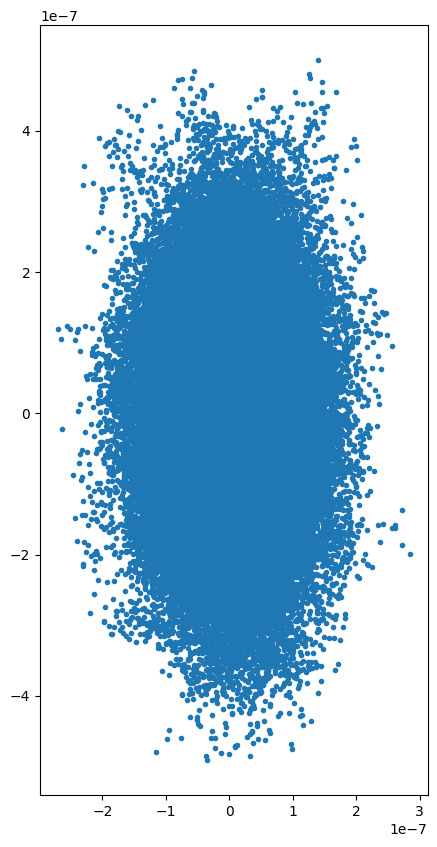

In [212]:
import numpy as np
import matplotlib.pyplot as plt


radius =10**(-6)
eta= 0.001
gamma = 6*np.pi*eta*radius 
temperature = 300
kx= 1*10**(-6)
ky = 0.25*10**(-6)
kb = 1.380649*10**(-23)

dt= 0.001

t=100000
position = np.zeros((t,2))
wx = np.random.normal(0,1,size=(t,1))
wy = np.random.normal(0,1,size=(t,1))
for i in range (t-1):
    position[i+1][0] = position[i][0] - kx*position[i][0]*dt/gamma + np.sqrt(2*kb*temperature*dt/gamma)*wx[i][0]
    position[i+1][1] = position[i][1] - ky*position[i][1]*dt/gamma + np.sqrt(2*kb*temperature*dt/gamma)*wy[i][0]

plt.figure(figsize =(5,10))
plt.plot(position[:,0], position[:,1],'.')
plt.show()


5.4.B

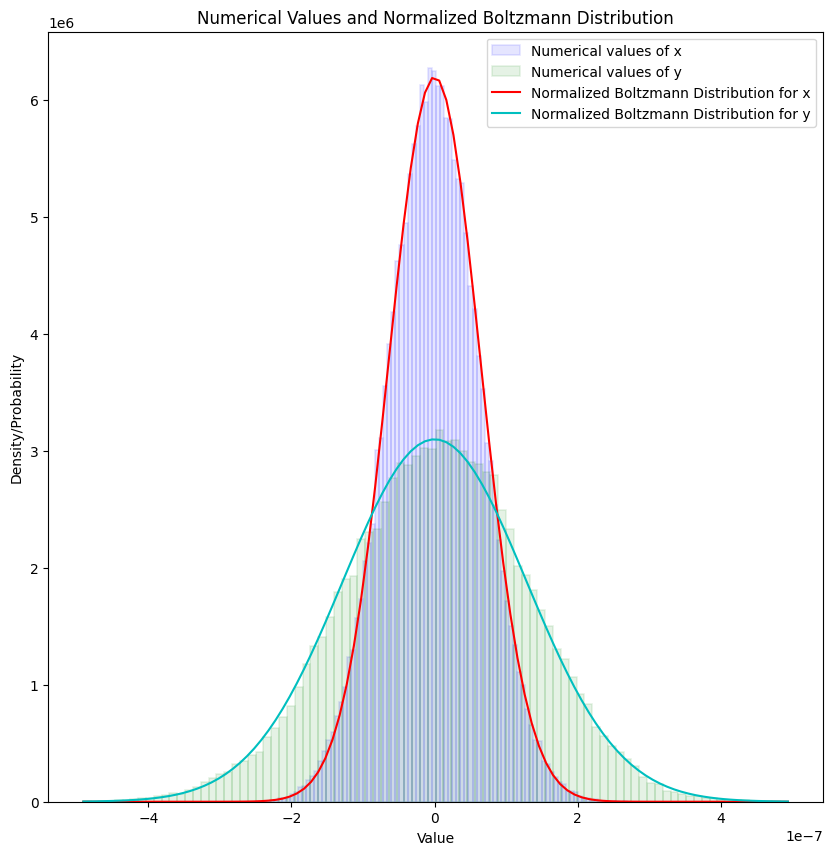

In [207]:
#probability distribution
x = position[:,0]
y = position[:,1]

def potential (x,k):
    return 0.5*k*x**2

def boltzmann_distribution_x(x,k):
    scaled_potential = potential(x, k) - np.min(potential(x, k))
    return np.exp(-scaled_potential / (kb * temperature))

x_values = np.linspace(min(min(x), min(y)), max(max(x), max(y)), 100)
# print(x_values)

probabilities_x = boltzmann_distribution_x(x_values,kx)
probabilities_y = boltzmann_distribution_x(x_values,ky)

probabilities_x /= np.trapz(probabilities_x, x=x_values)
probabilities_y /= np.trapz(probabilities_y, x=x_values)

# probabilities_x /= np.sum(probabilities_x)
# probabilities_y /= np.sum(probabilities_y)


plt.figure(figsize =(10,10))

plt.hist(x, bins=90, density=True, color="b", 
         alpha=0.1, label="Numerical values of x" , 
         edgecolor= 'blue', linewidth=1.2)
plt.hist(y, bins=90, density=True, color="g", 
         alpha=0.1, label="Numerical values of y", 
         edgecolor = 'green', linewidth=1.2)
plt.plot(x_values, probabilities_x, color="r", 
         label="Normalized Boltzmann Distribution for x")
plt.plot(x_values, probabilities_y, color="c", 
         label="Normalized Boltzmann Distribution for y")

plt.title('Numerical Values and Normalized Boltzmann Distribution')
plt.xlabel('Value')
plt.ylabel('Density/Probability')
plt.legend()
plt.show()


5.4.C

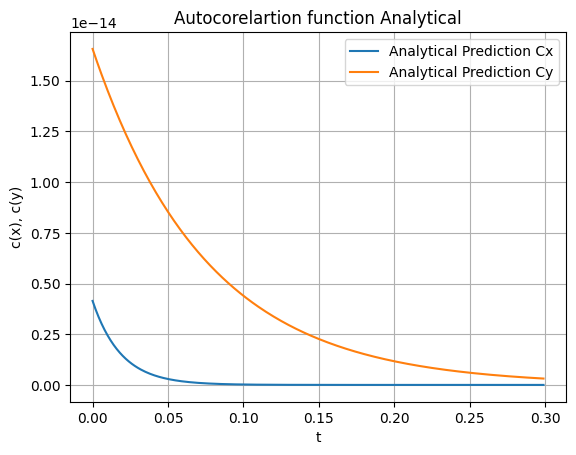

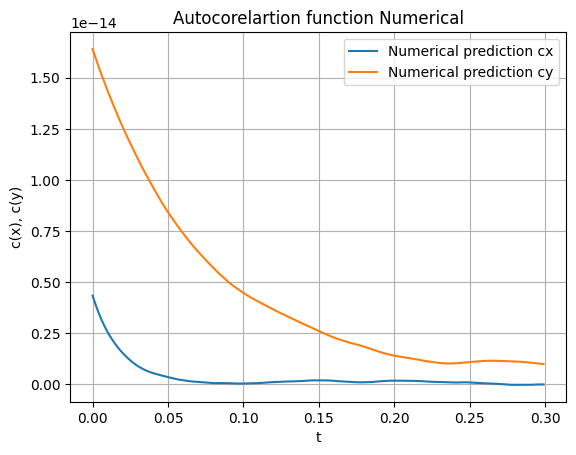

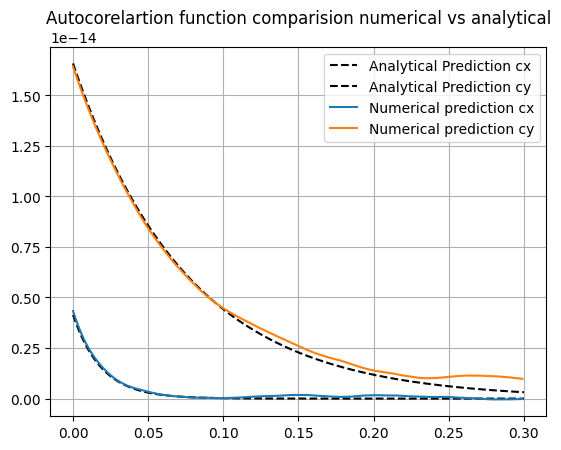

In [216]:
#positional autocorrelation function
position= np.array(position)
# print(traj)
cx=[]
cy=[]
time_list=[]
ttemp=0
for i in range(300):
    cxtemp=0
    cytemp=0
    for j in range(len(position)-i):
        cxtemp+= (position[i+j][0])*position[j][0]
        cytemp += (position[i+j][1])*position[j][1]
    
    time_list.append(dt*i)
    cx.append(cxtemp / (len(position) - i))
    cy.append(cytemp / (len(position) - i)) 

time_list=np.array(time_list)
t_values = np.linspace(0, 0.3, 300)

cx_values = kb * temperature / kx * np.exp(-kx * 
                                           time_list / gamma)
cy_values = kb * temperature / ky * np.exp(-ky *
                                            time_list / gamma)



plt.plot(time_list, cx_values, label='Analytical Prediction Cx')
plt.plot(time_list, cy_values, label='Analytical Prediction Cy')
plt.xlabel('t')
plt.ylabel('c(x), c(y)')
plt.title('Autocorelartion function Analytical')
plt.grid(True)
plt.legend()
plt.show()



plt.plot(time_list, cx, label= "Numerical prediction cx")
plt.plot(time_list, cy, label= "Numerical prediction cy")
plt.xlabel('t')
plt.ylabel('c(x), c(y)')
plt.title('Autocorelartion function Numerical')
plt.grid(True)
plt.legend()
plt.show()



plt.plot(t_values, cx_values, label='Analytical Prediction cx',
          linestyle ='--' , color='black')
plt.plot(t_values, cy_values, label='Analytical Prediction cy',
          linestyle ='--',color = 'black')
plt.plot(time_list, cx, label= "Numerical prediction cx")
plt.plot(time_list, cy, label= "Numerical prediction cy")
plt.title('Autocorelartion function comparision numerical 
          vs analytical')
plt.grid(True)
plt.legend()
plt.show()

5.4.d

5000


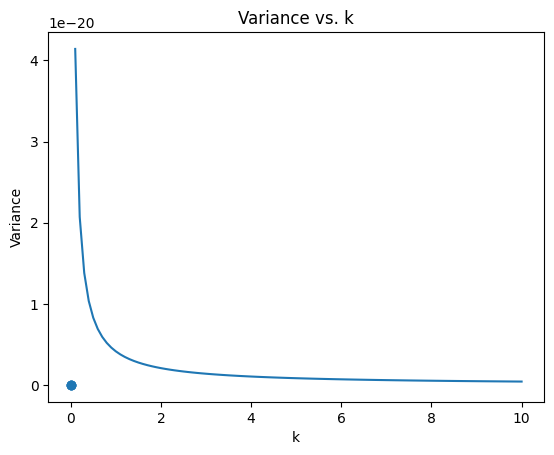

In [201]:
positional_variance = []
p=[]
k_list =  [1.25, 2.5, 5, 10] #[10,5,2.5,1.25]
print(t)
import statistics

wx = np.random.normal(0,1,size=(t,1))
for j in k_list:
    position1=np.zeros((t,1))

    k= j*10**-6
    for i in range(t-1):
        position1[i+1] = position1[i] - k*position1[i]*dt/gamma 
        + np.sqrt(2*kb*temperature*dt/gamma)*wx[i]
        position1[i+1]= position1[i+1]**2
    position1 = position1.flatten().tolist()
    positional_variance.append(statistics.pvariance(position1))

k_values = np.linspace(0.1, 10, 100)
variance_values = kb * temperature / k_values
k_list = np.array(k_list)*10**-6
plt.plot(k_values, variance_values)
plt.xlabel('k')
plt.ylabel('Variance')
plt.title('Variance vs. k')
plt.scatter(k_list, positional_variance)
plt.show()


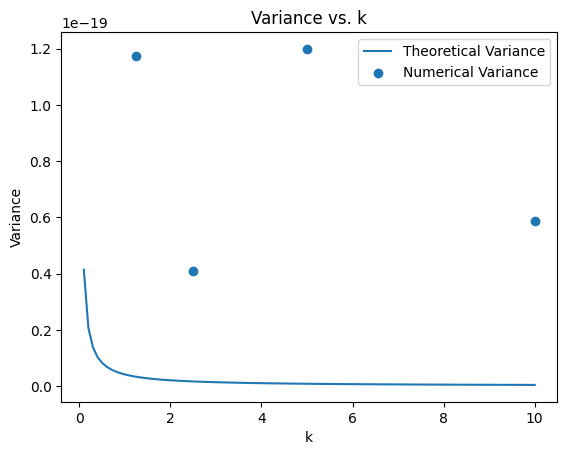

In [211]:
import numpy as np
import matplotlib.pyplot as plt

t = 5000
temperature = 300
gamma = 1.0
kb = 1.380649e-23
dt = 0.01

positional_variance = []
k_list = [1.25, 2.5, 5, 10]

for j in k_list:
    k = j * 1e-6
    wx = np.random.normal(0, 1, size=(t, 1))
    position1 = np.zeros((t, 1))

    for i in range(t - 1):
        position1[i + 1] = (
            position1[i]
            - k * position1[i] * dt / gamma
            + np.sqrt(2 * kb * temperature * dt / gamma) * wx[i]
        )

    positional_variance.append(np.var(position1.flatten()))

k_values = np.linspace(0.1, 10, 100)
variance_values_theoretical = kb * temperature / k_values

plt.plot(k_values, variance_values_theoretical, label='Theoretical Variance')
plt.scatter(k_list, positional_variance, label='Numerical Variance')
plt.xlabel('k')
plt.ylabel('Variance')
plt.title('Variance vs. k')
plt.legend()
plt.show()
